# About Dataset

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

**Data includes:**

* Reviews from Oct 1999 - Oct 2012
* 568,454 reviews
* 256,059 users
* 74,258 products
* 260 users with > 50 reviews

**Import Libraries :**

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/Reviews.csv


* Reading dataframe

In [3]:
df = pd.read_csv('data/Reviews.csv')

* let's have a look at top 5 rows

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


* Let's have a look at last 5 Rows.

In [5]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


## Columns :
* ProductId - Unique identifier for the product
* UserId - Unique identifier for the user
* ProfileName - Profile name of User
* HelpfulnessNumerator - Num of users who found review helpful
* HelpfulnessDenomitaor - Number of users who indicated whether they found the review helpful or not
* Score - Rating between 1 to 5
* Time - Timestamp for the review
* Summary - Bried summary of the review
* Text - Text of the review

* Checking shape of dataframe

In [6]:
df.shape

(568454, 10)

We have 10 columns and 568454 rows in our dataframe.

* Let's check for null values, if there is any.

In [7]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

* As we see, There are missing values in 'PROFILENAME' and 'SUMMARY' column.

* Dropping null values.

In [8]:
df.dropna(inplace = True)

In [9]:
# checking columns
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [10]:
# checking info of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [11]:
# ststistical analysis 
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284227.440964,1.743874,2.227876,4.183309,1.296261e+09
std,164099.020907,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


* Let's do value count on Score

In [12]:
df['Score'].value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

/home/dibaj/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

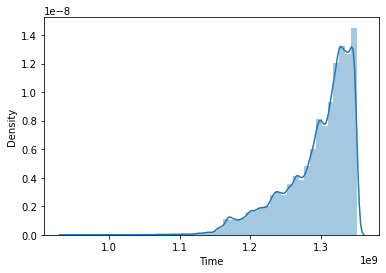

In [13]:
sns.distplot(df['Time'],bins = 50)

## Highest reviews by ProfileName. 

In [14]:
profilename = df['ProfileName'].value_counts().head(10)
profilename

C. F. Hill "CFH"                          451
O. Brown "Ms. O. Khannah-Brown"           421
Gary Peterson                             389
Rebecca of Amazon "The Rebecca Review"    365
Chris                                     363
Linda                                     290
John                                      261
Mike                                      260
c2                                        256
Laura                                     253
Name: ProfileName, dtype: int64

<AxesSubplot:xlabel='ProfileName'>

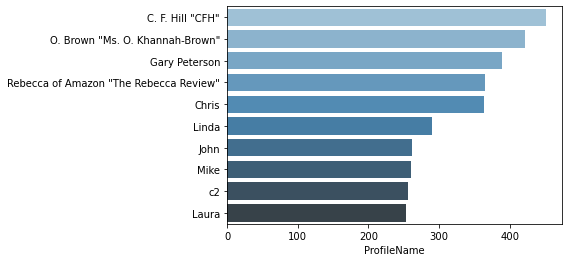

In [15]:
sns.barplot(y=profilename.index,x=profilename,palette='Blues_d')

**C. F. Hill "CFH"** wrote highest reviews approx 450.

## Highest review contribution by ProfileName 

In [16]:
profile = df.groupby('ProfileName').filter(lambda x : len(x) > 300 )
len(profile)

1989

In [17]:
profilegroup = profile.groupby('ProfileName')['Score'].count()
profilegroup

ProfileName
C. F. Hill "CFH"                          451
Chris                                     363
Gary Peterson                             389
O. Brown "Ms. O. Khannah-Brown"           421
Rebecca of Amazon "The Rebecca Review"    365
Name: Score, dtype: int64

<AxesSubplot:xlabel='ProfileName', ylabel='count'>

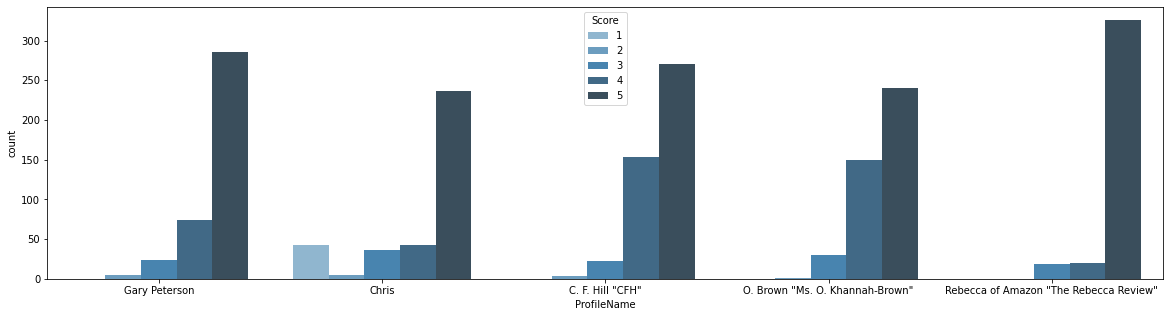

In [18]:
plt.figure(figsize = (20,5))
sns.countplot(x='ProfileName',hue = 'Score',data = profile,palette='Blues_d')

# Rating Score Count.

<AxesSubplot:xlabel='Score', ylabel='count'>

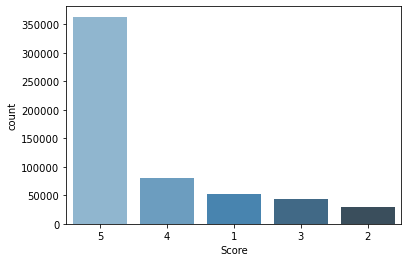

In [19]:
sns.countplot(x='Score',data = df,palette='Blues_d',order = df['Score'].value_counts().index)


* 5 rating score with highest 350000+ reviews, followed by 4 with approx 70000 reviews.
* 2 rating score with lowest count.

# Top 10 Product got highest reviews.

In [20]:
productid = df['ProductId'].value_counts().head(10)

<AxesSubplot:xlabel='ProductId'>

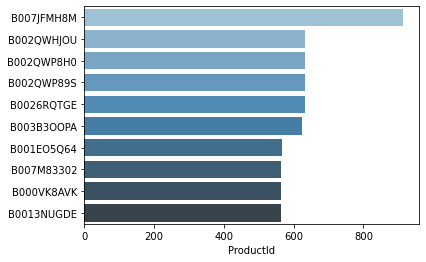

In [21]:
sns.barplot(x=productid, y=productid.index, palette='Blues_d')

### Products with highest count

In [22]:
products = df.groupby('ProductId').filter(lambda x : len(x) > 600 )
len(products)

4064

In [23]:
productsgroup = products.groupby('ProductId').count()
productsgroup

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
B0026RQTGE,632,632,632,632,632,632,632,632,632
B002QWHJOU,632,632,632,632,632,632,632,632,632
B002QWP89S,632,632,632,632,632,632,632,632,632
B002QWP8H0,632,632,632,632,632,632,632,632,632
B003B3OOPA,623,623,623,623,623,623,623,623,623
B007JFMH8M,913,913,913,913,913,913,913,913,913


<AxesSubplot:xlabel='ProductId', ylabel='count'>

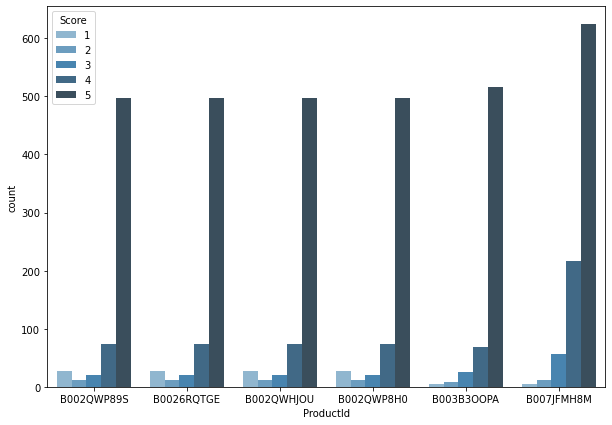

In [24]:
plt.figure(figsize = (10,7))
sns.countplot(x='ProductId',hue = 'Score',data = products,palette='Blues_d')

##  Pair plot

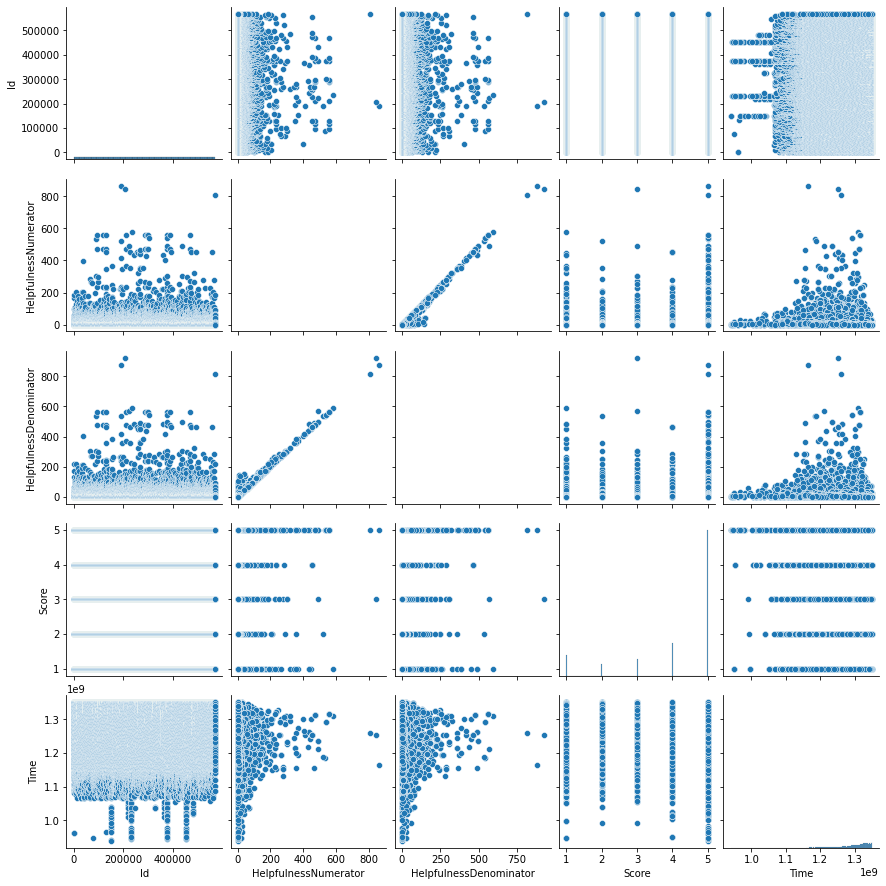

In [25]:
sns.pairplot(df)

## Positive corealtion (HelpfulnessNumerator - HelpfulnessDenominator) 

<AxesSubplot:xlabel='HelpfulnessNumerator', ylabel='HelpfulnessDenominator'>

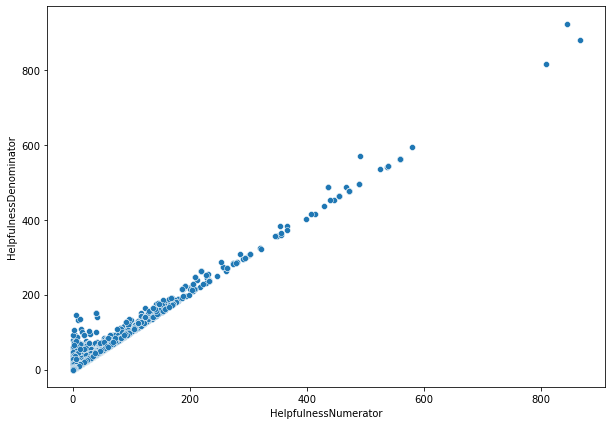

In [26]:
plt.figure(figsize = (10,7))
sns.scatterplot(data=df,x='HelpfulnessNumerator',y='HelpfulnessDenominator')

In [27]:
df.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,0.001225,0.000760,0.010712,0.007913
HelpfulnessNumerator,0.001225,1.000000,0.974849,-0.032594,-0.154850
HelpfulnessDenominator,0.000760,0.974849,1.000000,-0.097808,-0.173043
Score,0.010712,-0.032594,-0.097808,1.000000,-0.062964
Time,0.007913,-0.154850,-0.173043,-0.062964,1.000000


<AxesSubplot:>

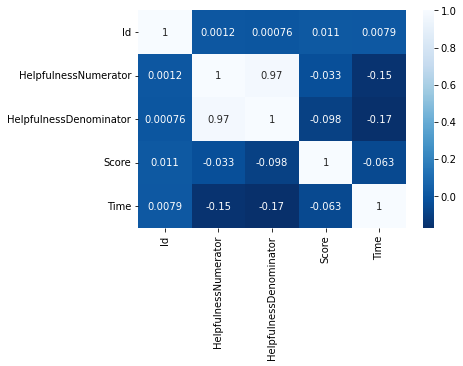

In [28]:
sns.heatmap(df.corr(),annot = True,cmap='Blues_r')

## Conclusion :

* More than 75% of our data is belonging to positive class(Score = 4,5).
* We have highly imbalanced dataset.